In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Plot Area,Ready To Move,Munnekollal,43.0,2400,40.0,0.0,660.0
1,Super built-up Area,Ready To Move,2Electronic City Phase II,27.0,8000,27.0,0.0,230.0
2,Super built-up Area,Ready To Move,1Hanuman Nagar,19.0,2000,16.0,NaN,490.0
3,Plot Area,coming soon,1Kasavanhalli,18.0,1200,18.0,NaN,200.0
4,Super built-up Area,Ready To Move,Koramangala Industrial Layout,16.0,10000,16.0,NaN,550.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  float64
 4   total_sqft    13320 non-null  object 
 5   bath          13247 non-null  float64
 6   balcony       12711 non-null  float64
 7   price         13320 non-null  float64
dtypes: float64(4), object(4)
memory usage: 832.6+ KB


In [5]:
df['area_type'].unique()

array(['Plot  Area', 'Super built-up  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  float64
 4   total_sqft    13320 non-null  object 
 5   bath          13247 non-null  float64
 6   balcony       12711 non-null  float64
 7   price         13320 non-null  float64
dtypes: float64(4), object(4)
memory usage: 832.6+ KB


In [7]:
df['size'].value_counts()

2.0     5528
3.0     4857
4.0     1417
1.0      656
5.0      356
6.0      221
7.0      100
8.0       89
9.0       54
10.0      14
11.0       4
16.0       1
14.0       1
12.0       1
27.0       1
18.0       1
19.0       1
13.0       1
43.0       1
Name: size, dtype: int64

In [8]:
df['size']=df['size'].replace('BHk','')
df['size']=df['size'].replace('Bedroom','')


In [9]:
df['size']

0        43.0
1        27.0
2        19.0
3        18.0
4        16.0
         ... 
13315     NaN
13316     NaN
13317     NaN
13318     NaN
13319     NaN
Name: size, Length: 13320, dtype: float64

In [10]:
df['availability'].value_counts()

Ready To Move           11019
coming soon              1662
coming soon               623
Immediate Possession       16
Name: availability, dtype: int64

In [11]:
df['availability']=df['availability'].replace('coming soon ','coming soon')


In [12]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()

df['area_type']=l.fit_transform(df['area_type'])
df['availability']=l.fit_transform(df['availability'])


In [13]:
df['size']=l.fit_transform(df['size'])

In [14]:
df

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,2,1,Munnekollal,18,2400,40.0,0.0,660.00
1,3,1,2Electronic City Phase II,17,8000,27.0,0.0,230.00
2,3,1,1Hanuman Nagar,16,2000,16.0,NaN,490.00
3,2,2,1Kasavanhalli,15,1200,18.0,NaN,200.00
4,3,1,Koramangala Industrial Layout,14,10000,16.0,NaN,550.00
...,...,...,...,...,...,...,...,...
13315,2,0,Carmelaram,30,2000,NaN,NaN,120.00
13316,2,0,Mysore Road,31,1200 - 2400,NaN,NaN,42.30
13317,2,0,Rajankunte,32,1575,NaN,NaN,31.11
13318,2,0,Yelahanka,33,1200 - 1800,NaN,NaN,12.75


In [15]:
df.dropna(inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12710 entries, 0 to 13303
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12710 non-null  int32  
 1   availability  12710 non-null  int32  
 2   location      12710 non-null  object 
 3   size          12710 non-null  int64  
 4   total_sqft    12710 non-null  object 
 5   bath          12710 non-null  float64
 6   balcony       12710 non-null  float64
 7   price         12710 non-null  float64
dtypes: float64(3), int32(2), int64(1), object(2)
memory usage: 794.4+ KB


In [17]:
df.describe()

,area_type,availability,size,bath,balcony,price
count,12710.000000,12710.000000,12710.000000,12710.000000,12710.000000,12710.000000
mean,2.297325,1.174351,1.734540,2.617309,1.584343,106.060778
std,1.145604,0.379426,1.147832,1.226000,0.817287,131.766089
min,0.000000,1.000000,0.000000,1.000000,0.000000,8.000000
25%,2.000000,1.000000,1.000000,2.000000,1.000000,49.030000
50%,3.000000,1.000000,2.000000,2.000000,2.000000,70.000000
75%,3.000000,1.000000,2.000000,3.000000,2.000000,115.000000
max,3.000000,2.000000,18.000000,40.000000,3.000000,2912.000000


In [18]:
#df['bath']=df['bath'].fillna(2)

In [19]:
#df['bath'].isnull().value_counts()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12710 entries, 0 to 13303
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12710 non-null  int32  
 1   availability  12710 non-null  int32  
 2   location      12710 non-null  object 
 3   size          12710 non-null  int64  
 4   total_sqft    12710 non-null  object 
 5   bath          12710 non-null  float64
 6   balcony       12710 non-null  float64
 7   price         12710 non-null  float64
dtypes: float64(3), int32(2), int64(1), object(2)
memory usage: 794.4+ KB


In [21]:
df.drop('location',axis=1,inplace=True)

In [22]:
df.head()

,area_type,availability,size,total_sqft,bath,balcony,price
0,2,1,18,2400,40.0,0.0,660.0
1,3,1,17,8000,27.0,0.0,230.0
5,3,1,13,1250,15.0,0.0,125.0
6,3,1,12,5425,13.0,0.0,275.0
7,2,1,11,2232,6.0,2.0,300.0


In [23]:
#df['balcony']=df['balcony'].fillna(2)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12710 entries, 0 to 13303
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12710 non-null  int32  
 1   availability  12710 non-null  int32  
 2   size          12710 non-null  int64  
 3   total_sqft    12710 non-null  object 
 4   bath          12710 non-null  float64
 5   balcony       12710 non-null  float64
 6   price         12710 non-null  float64
dtypes: float64(3), int32(2), int64(1), object(1)
memory usage: 695.1+ KB


In [25]:
df.drop('total_sqft',axis=1,inplace=True)

In [26]:
df

,area_type,availability,size,bath,balcony,price
0,2,1,18,40.0,0.0,660.0
1,3,1,17,27.0,0.0,230.0
5,3,1,13,15.0,0.0,125.0
6,3,1,12,13.0,0.0,275.0
7,2,1,11,6.0,2.0,300.0
...,...,...,...,...,...,...
13299,0,1,0,1.0,1.0,41.0
13300,3,1,0,1.0,1.0,52.0
13301,3,1,0,1.0,1.0,46.0
13302,3,1,0,2.0,1.0,30.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12710 entries, 0 to 13303
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12710 non-null  int32  
 1   availability  12710 non-null  int32  
 2   size          12710 non-null  int64  
 3   bath          12710 non-null  float64
 4   balcony       12710 non-null  float64
 5   price         12710 non-null  float64
dtypes: float64(3), int32(2), int64(1)
memory usage: 595.8 KB


In [28]:
df.corr()

,area_type,availability,size,bath,balcony,price
area_type,1.000000,0.125289,-0.125649,-0.098645,0.097129,-0.061409
availability,0.125289,1.000000,-0.094985,-0.065115,-0.102486,-0.052900
size,-0.125649,-0.094985,1.000000,0.869674,0.201014,0.419786
bath,-0.098645,-0.065115,0.869674,1.000000,0.204191,0.459736
balcony,0.097129,-0.102486,0.201014,0.204191,1.000000,0.120363
price,-0.061409,-0.052900,0.419786,0.459736,0.120363,1.000000


In [29]:
#df.drop(['area_type','availability'],axis=1,inplace=True)

In [30]:
df.corr()

,area_type,availability,size,bath,balcony,price
area_type,1.000000,0.125289,-0.125649,-0.098645,0.097129,-0.061409
availability,0.125289,1.000000,-0.094985,-0.065115,-0.102486,-0.052900
size,-0.125649,-0.094985,1.000000,0.869674,0.201014,0.419786
bath,-0.098645,-0.065115,0.869674,1.000000,0.204191,0.459736
balcony,0.097129,-0.102486,0.201014,0.204191,1.000000,0.120363
price,-0.061409,-0.052900,0.419786,0.459736,0.120363,1.000000


In [31]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)


In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
l=LinearRegression()

In [35]:
l.fit(x_train,y_train)

LinearRegression()

In [36]:
p=l.predict(x_test)

In [37]:
import seaborn as sns

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

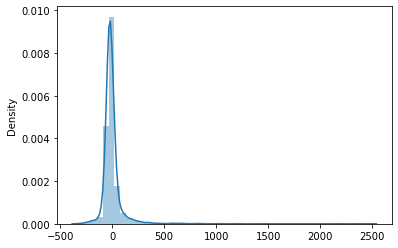

In [38]:
sns.distplot(y_test-p)

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

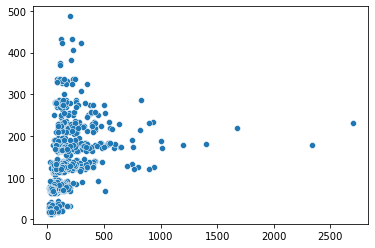

In [39]:
sns.scatterplot(y_test,p)

In [40]:
l.score(x_test,y_test)

0.19543599873715156

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

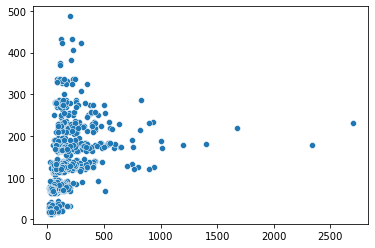

In [42]:
sns.scatterplot(y_test,p)

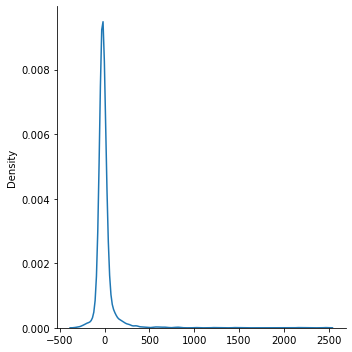

In [43]:
sns.displot(y_test-p,kind='kde')

In [44]:
s=y_test-p

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

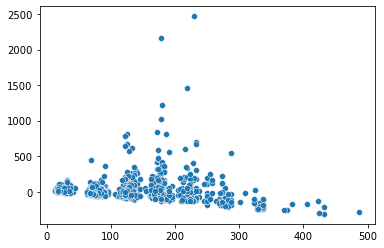

In [45]:
sns.scatterplot(p,s)

In [46]:
from sklearn import metrics
import numpy as np
print('Linear Regression error')
print('MAE',metrics.mean_absolute_error(y_test,p))
print("MSE",metrics.mean_squared_error(y_test,p))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,p)))

Linear Regression error
MAE 49.706605660906106
MSE 13200.833527569841
RMSE 114.89488033663572


In [47]:
import pickle
pickle.dump(l,open('model.pkl','wb'))